# 2 - Ridge Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import os
from common import *
import pandas as pd
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import Lasso, Ridge, LinearRegression

print(f"Root directory: {os.getcwd()}")

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 10,
})

%matplotlib inline 

Root directory: /home/arefrode/uio/fys-stk4155/projects/FYS-STK4155-Prj1_report/code


## 2.1 Data
Defining and creating the data


In [2]:
features = 6
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
X = create_X(x, y, n=features) # Design Matrix
z = FrankeFunction(x,y)
# z += noise # Adding stochastic noise

## 2.3 - Finding optimal lambda for Ridge fit
First we find the optimal value for the lambda parameter by splitting the input data into training and test data. Than we fit the model using different values for lambda. For each lambda value we use the mean square error on the test data evaluate how god the fit is. The best lambda value is used to fit a new model with all data (not using train-test split). <br>
First we find the optimal parameter value of lambda, $\lambda$, by evaluating overfit from evaluation plot where we plot the values for MSE for training and test data

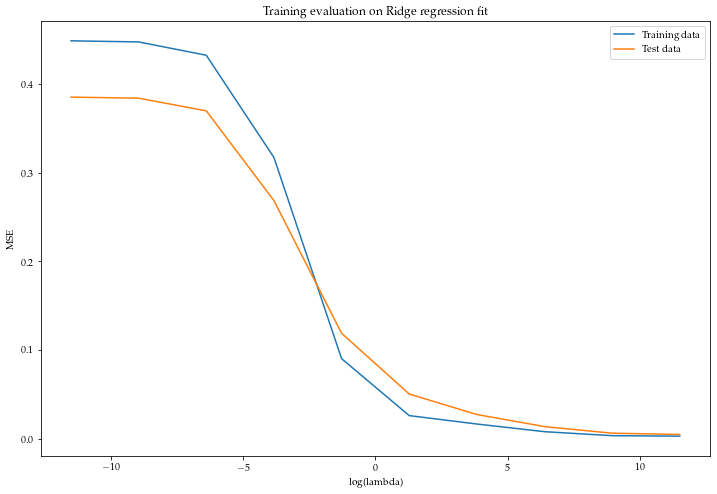

In [20]:
nbf_lambdas = 10
lambdas = np.logspace(-5,5, nbf_lambdas)
z_train_ridge = pd.DataFrame()
z_hat_train_ridge = pd.DataFrame()
z_test_ridge = pd.DataFrame()
z_hat_test_ridge = pd.DataFrame()

for lam in lambdas:
    #X_train, X_test, z_train, z_test = prepare_data(X, z, test_size=0.2, shuffle=True, scale_X=False, scale_t=False)
    X_train, X_test, z_train, z_test = prepare_data(X, z, test_size=0.2, shuffle=True, scale_X=False, scale_t=False, random_state=4155)
    model = RidgeRegression(lam) # The model
    model.fit(X_train, z_train) # Fitting the model
   
    # Predictions
    z_hat_train = model.predict(X_train) # predict on train data
    z_hat_test = model.predict(X_test) # predict on test data

    # Filling up dataframes
    z_train_ridge[lam] = z_train.flatten() 
    z_hat_train_ridge[lam] = z_hat_train.flatten()
    z_test_ridge[lam] = z_test.flatten()
    z_hat_test_ridge[lam] = z_hat_test.flatten()


# MSE calculations for all lambda values
mse_scores_train = ((z_train_ridge - z_hat_train_ridge) ** 2).mean()
mse_scores_test = ((z_test_ridge - z_hat_test_ridge) ** 2).mean()
# R2 calculations for all lambda values
R2_scores_train = 1 - ((z_train_ridge - z_hat_train_ridge) ** 2).sum() / ((z_train_ridge - z_train_ridge.mean())**2).sum() 
R2_scores_test = 1 - ((z_test_ridge - z_hat_test_ridge) ** 2).sum() / ((z_test_ridge - z_test_ridge.mean())**2).sum()  

# Plots
plt.figure(figsize=(12,8))
plt.plot(-np.log(lambdas), mse_scores_train, label="Training data")
plt.plot(-np.log(lambdas), mse_scores_test, label="Test data")
#plt.plot(mse_scores_train,-np.log(lambdas), label="Training data")
#plt.plot(mse_scores_test,-np.log(lambdas), label="Test data")
plt.xlabel("log(lambda)")
plt.ylabel("MSE")
plt.title("Training evaluation on Ridge regression fit")
plt.legend()
plt.savefig(f"{REPORT_FIGURES}franke_function_Ridge_evaluate_fit.pdf")

# 2.3.1
Finding the optimal lambda by using the bootstrap resampling technique over different values of lamda. For each value of lambda, a bias-variance tradeoff chart as in exercise 2 is created. 

Looping through polynomials up to 12 degrees with 100 bootstraps: 100%|██████████| 12/12 [00:04<00:00,  2.62it/s]


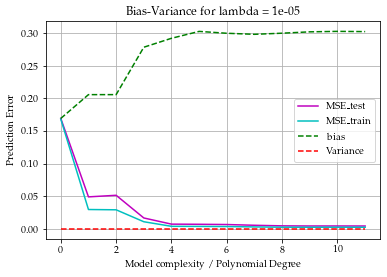

/home/arefrode/uio/fys-stk4155/projects/FYS-STK4155-Prj1_report/code/common.py:59: RuntimeWarning: invalid value encountered in sqrt
  SE_betas = np.sqrt(var_hat * invXTX_diag) # Standard Error


,lambda,coeff name,coeff value,Std Error,CI lower,CI_upper
0,0.00001,b_1,0.7042,0.0523,0.6017,0.8068
1,0.00001,b_2,2.5281,252144.7707,-494201.2224,494206.2786
2,0.00001,b_3,2.5281,252145.35,-494202.3579,494207.4141
3,0.00001,b_4,-4.6863,NaN,NaN,NaN
4,0.00001,b_5,-4.6863,257303.2654,-504319.0865,504309.714
...,...,...,...,...,...,...
73,0.00001,b_74,-0.5044,NaN,NaN,NaN
74,0.00001,b_75,-0.5044,467558.2338,-916414.6427,916413.6339
75,0.00001,b_76,-0.5044,NaN,NaN,NaN
76,0.00001,b_77,-0.5044,133458.6683,-261579.4943,261578.4855


Looping through polynomials up to 12 degrees with 100 bootstraps: 100%|██████████| 12/12 [00:03<00:00,  3.34it/s]


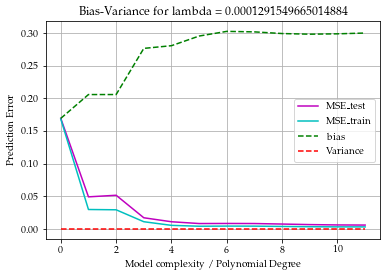

/home/arefrode/uio/fys-stk4155/projects/FYS-STK4155-Prj1_report/code/common.py:59: RuntimeWarning: invalid value encountered in sqrt
  SE_betas = np.sqrt(var_hat * invXTX_diag) # Standard Error


,lambda,coeff name,coeff value,Std Error,CI lower,CI_upper
0,0.000129,b_1,0.7268,0.0573,0.6145,0.8391
1,0.000129,b_2,2.3873,276125.1486,-541202.9039,541207.6785
2,0.000129,b_3,2.3873,276125.783,-541204.1473,541208.9219
3,0.000129,b_4,-5.1891,NaN,NaN,NaN
4,0.000129,b_5,-5.1891,281774.245,-552282.7093,552272.3312
...,...,...,...,...,...,...
73,0.000129,b_74,0.7995,NaN,NaN,NaN
74,0.000129,b_75,0.7995,512025.6368,-1003569.4487,1003571.0477
75,0.000129,b_76,0.7995,NaN,NaN,NaN
76,0.000129,b_77,0.7995,146151.3341,-286455.8153,286457.4143


Looping through polynomials up to 12 degrees with 100 bootstraps: 100%|██████████| 12/12 [00:02<00:00,  5.38it/s]


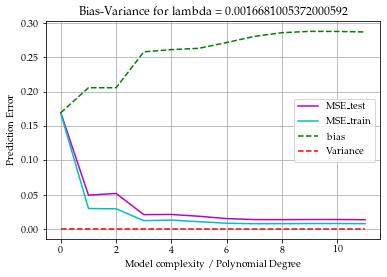

/home/arefrode/uio/fys-stk4155/projects/FYS-STK4155-Prj1_report/code/common.py:59: RuntimeWarning: invalid value encountered in sqrt
  SE_betas = np.sqrt(var_hat * invXTX_diag) # Standard Error


,lambda,coeff name,coeff value,Std Error,CI lower,CI_upper
0,0.001668,b_1,0.8389,0.0883,0.6659,1.0119
1,0.001668,b_2,1.2101,425398.7977,-833780.4333,833782.8536
2,0.001668,b_3,1.2101,425399.775,-833782.3489,833784.7692
3,0.001668,b_4,-2.5997,NaN,NaN,NaN
4,0.001668,b_5,-2.5997,434101.8037,-850842.135,850836.9356
...,...,...,...,...,...,...
73,0.001668,b_74,0.1356,NaN,NaN,NaN
74,0.001668,b_75,0.1356,788827.4263,-1546101.6201,1546101.8912
75,0.001668,b_76,0.1356,NaN,NaN,NaN
76,0.001668,b_77,0.1356,225160.9537,-441315.3337,441315.6048


Looping through polynomials up to 12 degrees with 100 bootstraps: 100%|██████████| 12/12 [00:02<00:00,  5.64it/s]


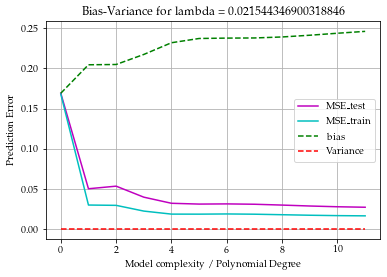

/home/arefrode/uio/fys-stk4155/projects/FYS-STK4155-Prj1_report/code/common.py:59: RuntimeWarning: invalid value encountered in sqrt
  SE_betas = np.sqrt(var_hat * invXTX_diag) # Standard Error


,lambda,coeff name,coeff value,Std Error,CI lower,CI_upper
0,0.021544,b_1,0.9644,0.1282,0.7132,1.2156
1,0.021544,b_2,0.1374,617573.3253,-1210443.5802,1210443.855
2,0.021544,b_3,0.1374,617574.7442,-1210446.3612,1210446.636
3,0.021544,b_4,-0.7609,NaN,NaN,NaN
4,0.021544,b_5,-0.7609,630207.927,-1235208.2979,1235206.7761
...,...,...,...,...,...,...
73,0.021544,b_74,-0.0988,NaN,NaN,NaN
74,0.021544,b_75,-0.0988,1145181.3673,-2244555.5787,2244555.3811
75,0.021544,b_76,-0.0988,NaN,NaN,NaN
76,0.021544,b_77,-0.0988,326877.7431,-640680.4753,640680.2777


Looping through polynomials up to 12 degrees with 100 bootstraps: 100%|██████████| 12/12 [00:02<00:00,  4.60it/s]


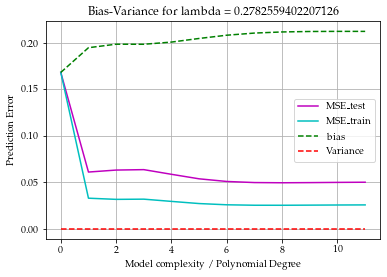

/home/arefrode/uio/fys-stk4155/projects/FYS-STK4155-Prj1_report/code/common.py:59: RuntimeWarning: invalid value encountered in sqrt
  SE_betas = np.sqrt(var_hat * invXTX_diag) # Standard Error


,lambda,coeff name,coeff value,Std Error,CI lower,CI_upper
0,0.278256,b_1,0.9274,0.161,0.612,1.2429
1,0.278256,b_2,-0.1526,775641.2603,-1520257.0228,1520256.7175
2,0.278256,b_3,-0.1526,775643.0423,-1520260.5155,1520260.2102
3,0.278256,b_4,-0.2304,NaN,NaN,NaN
4,0.278256,b_5,-0.2304,791509.6892,-1551359.2212,1551358.7603
...,...,...,...,...,...,...
73,0.278256,b_74,0.0096,NaN,NaN,NaN
74,0.278256,b_75,0.0096,1438290.6167,-2819049.5992,2819049.6184
75,0.278256,b_76,0.0096,NaN,NaN,NaN
76,0.278256,b_77,0.0096,410542.1239,-804662.5532,804662.5723


Looping through polynomials up to 12 degrees with 100 bootstraps: 100%|██████████| 12/12 [00:02<00:00,  5.90it/s]


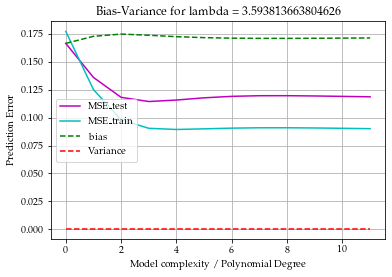

/home/arefrode/uio/fys-stk4155/projects/FYS-STK4155-Prj1_report/code/common.py:59: RuntimeWarning: invalid value encountered in sqrt
  SE_betas = np.sqrt(var_hat * invXTX_diag) # Standard Error


,lambda,coeff name,coeff value,Std Error,CI lower,CI_upper
0,3.593814,b_1,0.5668,0.3002,-0.0216,1.1552
1,3.593814,b_2,0.0004,1446724.0699,-2835579.1765,2835579.1773
2,3.593814,b_3,0.0004,1446727.3937,-2835585.6912,2835585.692
3,3.593814,b_4,-0.0556,NaN,NaN,NaN
4,3.593814,b_5,-0.0556,1476321.8223,-2893590.8274,2893590.7161
...,...,...,...,...,...,...
73,3.593814,b_74,0.005,NaN,NaN,NaN
74,3.593814,b_75,0.005,2682695.9334,-5258084.0245,5258084.0345
75,3.593814,b_76,0.005,NaN,NaN,NaN
76,3.593814,b_77,0.005,765742.1062,-1500854.5231,1500854.5331


Looping through polynomials up to 12 degrees with 100 bootstraps: 100%|██████████| 12/12 [00:02<00:00,  5.07it/s]


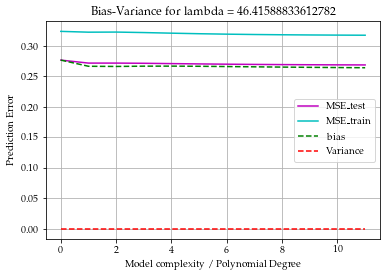

/home/arefrode/uio/fys-stk4155/projects/FYS-STK4155-Prj1_report/code/common.py:59: RuntimeWarning: invalid value encountered in sqrt
  SE_betas = np.sqrt(var_hat * invXTX_diag) # Standard Error


,lambda,coeff name,coeff value,Std Error,CI lower,CI_upper
0,46.415888,b_1,0.1336,0.5629,-0.9698,1.2369
1,46.415888,b_2,0.0227,2712850.8073,-5317187.5595,5317187.605
2,46.415888,b_3,0.0227,2712857.0399,-5317199.7756,5317199.821
3,46.415888,b_4,0.0038,NaN,NaN,NaN
4,46.415888,b_5,0.0038,2768351.5682,-5425969.0698,5425969.0774
...,...,...,...,...,...,...
73,46.415888,b_74,-0.0014,NaN,NaN,NaN
74,46.415888,b_75,-0.0014,5030505.8029,-9859791.3751,9859791.3722
75,46.415888,b_76,-0.0014,NaN,NaN,NaN
76,46.415888,b_77,-0.0014,1435895.1608,-2814354.5166,2814354.5137


Looping through polynomials up to 12 degrees with 100 bootstraps: 100%|██████████| 12/12 [00:01<00:00,  7.12it/s]


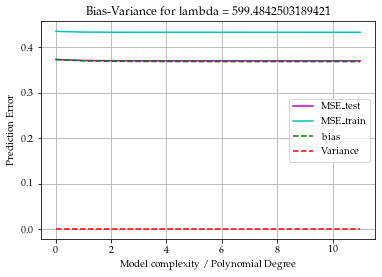

/home/arefrode/uio/fys-stk4155/projects/FYS-STK4155-Prj1_report/code/common.py:59: RuntimeWarning: invalid value encountered in sqrt
  SE_betas = np.sqrt(var_hat * invXTX_diag) # Standard Error


,lambda,coeff name,coeff value,Std Error,CI lower,CI_upper
0,599.48425,b_1,0.0136,0.6574,-1.2749,1.3021
1,599.48425,b_2,0.0032,3168037.6993,-6209353.8874,6209353.8938
2,599.48425,b_3,0.0032,3168044.9777,-6209368.1532,6209368.1596
3,599.48425,b_4,0.0012,NaN,NaN,NaN
4,599.48425,b_5,0.0012,3232850.8849,-6336387.7332,6336387.7356
...,...,...,...,...,...,...
73,599.48425,b_74,0.0001,NaN,NaN,NaN
74,599.48425,b_75,0.0001,5874570.0233,-11514157.2456,11514157.2457
75,599.48425,b_76,0.0001,NaN,NaN,NaN
76,599.48425,b_77,0.0001,1676822.7687,-3286572.6265,3286572.6266


Looping through polynomials up to 12 degrees with 100 bootstraps: 100%|██████████| 12/12 [00:02<00:00,  5.81it/s]


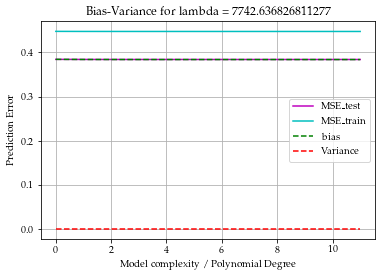

/home/arefrode/uio/fys-stk4155/projects/FYS-STK4155-Prj1_report/code/common.py:59: RuntimeWarning: invalid value encountered in sqrt
  SE_betas = np.sqrt(var_hat * invXTX_diag) # Standard Error


,lambda,coeff name,coeff value,Std Error,CI lower,CI_upper
0,7742.636827,b_1,0.0011,0.6687,-1.3096,1.3118
1,7742.636827,b_2,0.0003,3222730.685,-6316552.1424,6316552.143
2,7742.636827,b_3,0.0003,3222738.0892,-6316566.6545,6316566.655
3,7742.636827,b_4,0.0001,NaN,NaN,NaN
4,7742.636827,b_5,0.0001,3288662.8051,-6445779.0979,6445779.0982
...,...,...,...,...,...,...
73,7742.636827,b_74,0.0,NaN,NaN,NaN
74,7742.636827,b_75,0.0,5975988.5685,-11712937.5943,11712937.5943
75,7742.636827,b_76,0.0,NaN,NaN,NaN
76,7742.636827,b_77,0.0,1705771.4279,-3343311.9987,3343311.9987


Looping through polynomials up to 12 degrees with 100 bootstraps: 100%|██████████| 12/12 [00:03<00:00,  3.53it/s]


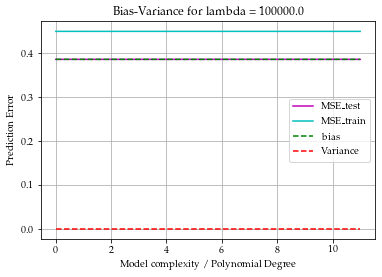

/home/arefrode/uio/fys-stk4155/projects/FYS-STK4155-Prj1_report/code/common.py:59: RuntimeWarning: invalid value encountered in sqrt
  SE_betas = np.sqrt(var_hat * invXTX_diag) # Standard Error


,lambda,coeff name,coeff value,Std Error,CI lower,CI_upper
0,100000.0,b_1,0.0001,0.6697,-1.3125,1.3127
1,100000.0,b_2,0.0,3227258.8575,-6325427.3607,6325427.3607
2,100000.0,b_3,0.0,3227266.272,-6325441.8931,6325441.8932
3,100000.0,b_4,0.0,NaN,NaN,NaN
4,100000.0,b_5,0.0,3293283.617,-6454835.8894,6454835.8894
...,...,...,...,...,...,...
73,100000.0,b_74,0.0,NaN,NaN,NaN
74,100000.0,b_75,0.0,5984385.2698,-11729395.1288,11729395.1288
75,100000.0,b_76,0.0,NaN,NaN,NaN
76,100000.0,b_77,0.0,1708168.1616,-3348009.5967,3348009.5967


In [24]:
n_bootstraps = 100
maxdegree = 12
for lmb in lambdas:
    MSE_test = np.zeros(maxdegree)
    MSE_train = np.zeros(maxdegree)
    polydegree = np.arange(maxdegree)
    bias = np.zeros(maxdegree)
    variance = np.zeros(maxdegree)

    for degree in tqdm(range(maxdegree), desc = f"Looping through polynomials up to {maxdegree} degrees with {n_bootstraps} bootstraps: "):
        model = RidgeRegression(lmb)
        X = create_X(x, y, n=degree)
        X_train, X_test, z_train, z_test = prepare_data(X, z)

        # Reshape for broadcasting
        z_test_ = np.reshape(z_test, newshape=(z_test.shape[0],1))
        z_train_ = np.reshape(z_train, newshape=(z_train.shape[0],1))
        
        # Scaling data and preparing output arrays 
        scaler = StandardScaler()
        scaler.fit(X_train)
        #X_train_scaled = scaler.transform(X_train)
        #X_test_scaled = scaler.transform(X_test)
        z_pred = np.empty((z_test.shape[0], n_bootstraps))
        z_fit = np.empty((z_train.shape[0], n_bootstraps))

        # Bootstrapping
        for i in range(n_bootstraps):
            x_, z_ = resample(X_train, z_train)
            model.fit(X_train, z_train)
            z_pred[:,i] = model.predict(X_test)
            z_fit[:,i] = model.predict(X_train)

        MSE_test[degree] = np.mean( np.mean((z_test_ - z_pred)**2, axis=1, keepdims=True) )
        MSE_train[degree] = np.mean( np.mean((z_train_ - z_fit)**2, axis=1, keepdims=True) )
        bias[degree] = np.mean( (z_test - np.mean(z_pred, axis=1, keepdims=True))**2 )
        variance[degree] = np.mean( np.var(z_pred, axis=1, keepdims=True))

    plt.figure()
    plt.plot(polydegree, MSE_test,"m", label='MSE\_test')
    plt.plot(polydegree, MSE_train,"c", label='MSE\_train')

    plt.plot(polydegree, bias,"g--", label='bias')
    plt.plot(polydegree, variance,"r--", label='Variance')

    plt.title(f"Bias-Variance for lambda = {lmb}")
    plt.xlabel("Model complexity / Polynomial Degree")
    plt.ylabel("Prediction Error")

    plt.grid(True)
    plt.legend()
    plt.show()

    display(model.summary())
      


## 2.4 Analysis of plots and training metrics
Do the analysis.......

Conclusion:<br>
Based on the analysis, we conclude that a model complexity of degree 5 yields the most optimal fit.

## 2.5 plot of the model using the most optimal parameters

NameError: name 'degree' is not defined

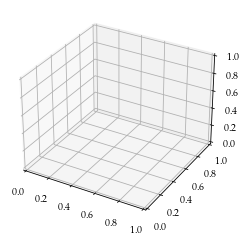

In [ ]:
scale = False

if scale:
    # Data Scalling
    X_scaler = StandardScaler()
    X_scaler.fit(X)
    X_train = X_scaler.transform(X_train)
    z_train = np.expand_dims(z,axis=1)  
    z_scaler = StandardScaler()
    z_scaler.fit(z_train)
    z_train = z_scaler.transform(z_train)
else:
    X_train = X; z_train = z

lam = -1.1
model = RidgeRegression(lam) # The model
model.fit(X_train, z_train) # Fitting the model
z_hat = model.predict(X_train) # predict on train data

# Evaluatation metrics
# TODO:
results_df = pd.DataFrame(columns=["MSE", "R2-score"], index=["Training data", "Test data"])
results_df["MSE"] = MSE(z, z_hat)
results_df["R2-score"] = R2(z, z_hat)
results_df.to_csv(f"{REPORT_DATA}redge_reg_lambda_{lam}.csv")

# Plot
fig = plt.figure()#figsize=(8,8))
ax = plt.axes(projection='3d')
ax.title.set_text(f"Ridge regression fit to the Franke Function\nDegree {degree},$\lambda$:{lam}")
#ax.view_init(elev=5., azim=85.0)
ax.view_init(elev=30., azim=-25.0)
ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("z")
ax.scatter3D(x,y,z,c=z, cmap=cm.coolwarm, marker = '.')
plt.savefig(f"{REPORT_FIGURES}franke_function_Ridge_best_fit.pdf")